In [31]:

import pandas as pd
data=pd.read_csv('GujaratRainTSFinal(1).csv',index_col=0)



In [32]:

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('GujaratRainTSFinal(1).csv', parse_dates=['datetime'], index_col='datetime',date_parser=dateparse)
print (data.head())

            foo
datetime       
1954-01-01  0.0
1954-02-01  0.0
1954-03-01  0.5
1954-04-01  0.3
1954-05-01  1.5


In [33]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 10

In [34]:
data.index

DatetimeIndex(['1954-01-01', '1954-02-01', '1954-03-01', '1954-04-01',
               '1954-05-01', '1954-06-01', '1954-07-01', '1954-08-01',
               '1954-09-01', '1954-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='datetime', length=768, freq=None)

In [35]:
ts=data['foo']
tstrain=ts
tstrain



datetime
1954-01-01      0.0
1954-02-01      0.0
1954-03-01      0.5
1954-04-01      0.3
1954-05-01      1.5
1954-06-01     66.1
1954-07-01    217.5
1954-08-01    168.0
1954-09-01      7.2
1954-10-01     12.6
1954-11-01      7.1
1954-12-01      0.3
1955-01-01      0.0
1955-02-01      0.0
1955-03-01      0.0
1955-04-01      0.0
1955-05-01      0.2
1955-06-01    135.9
1955-07-01    483.3
1955-08-01    138.0
1955-09-01     11.6
1955-10-01      1.9
1955-11-01      0.0
1955-12-01      0.0
1956-01-01     12.6
1956-02-01      0.0
1956-03-01      0.0
1956-04-01      0.1
1956-05-01      0.3
1956-06-01    141.9
              ...  
2015-07-01    162.1
2015-08-01    205.4
2015-09-01    247.3
2015-10-01      4.6
2015-11-01      0.0
2015-12-01      0.0
2016-01-01      0.0
2016-02-01      1.1
2016-03-01      0.1
2016-04-01      5.6
2016-05-01      0.0
2016-06-01    168.2
2016-07-01    454.2
2016-08-01    238.1
2016-09-01    323.3
2016-10-01     59.9
2016-11-01      0.1
2016-12-01      0.0
2017-01-01 

In [36]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


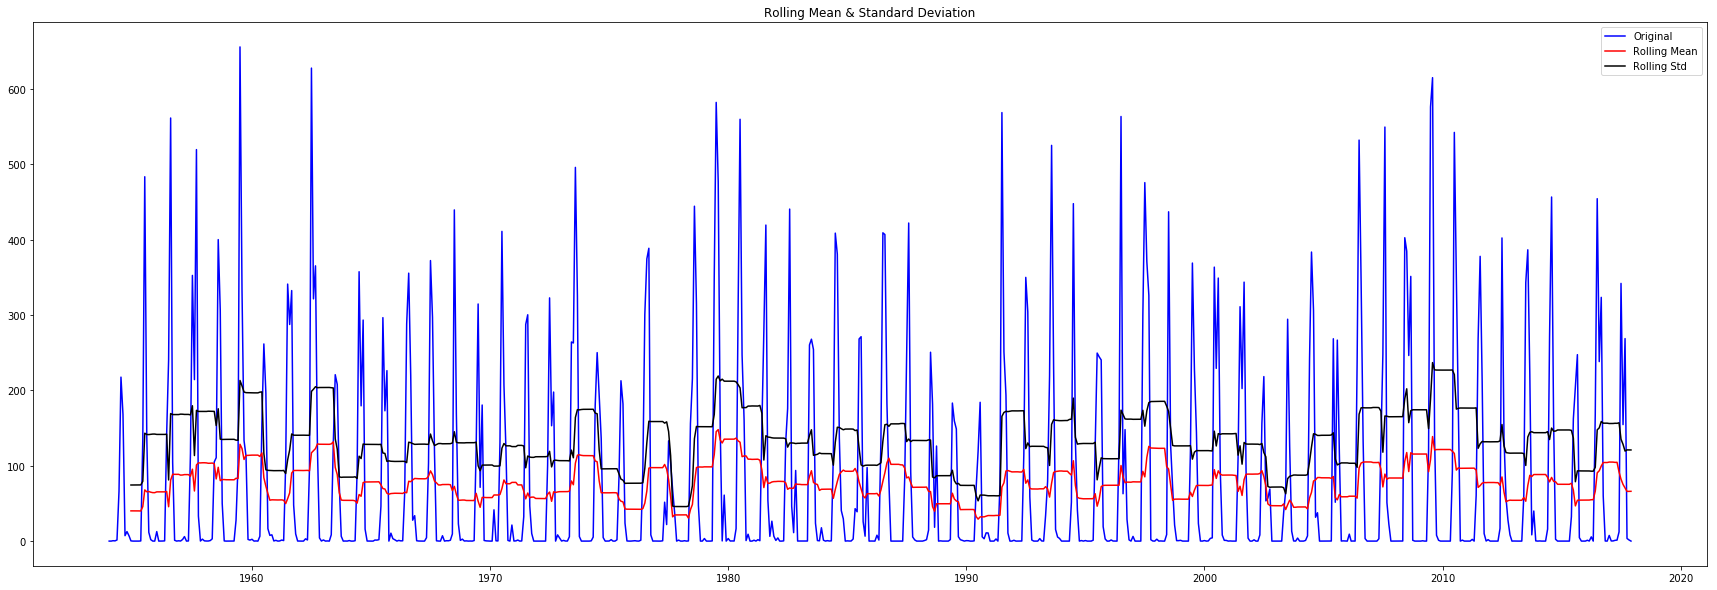

Results of Dickey-Fuller Test:
Test Statistic                -7.185550e+00
p-value                        2.582548e-10
#Lags Used                     2.000000e+01
Number of Observations Used    7.470000e+02
Critical Value (1%)           -3.439134e+00
Critical Value (5%)           -2.865417e+00
Critical Value (10%)          -2.568834e+00
dtype: float64


In [37]:
test_stationarity(tstrain)

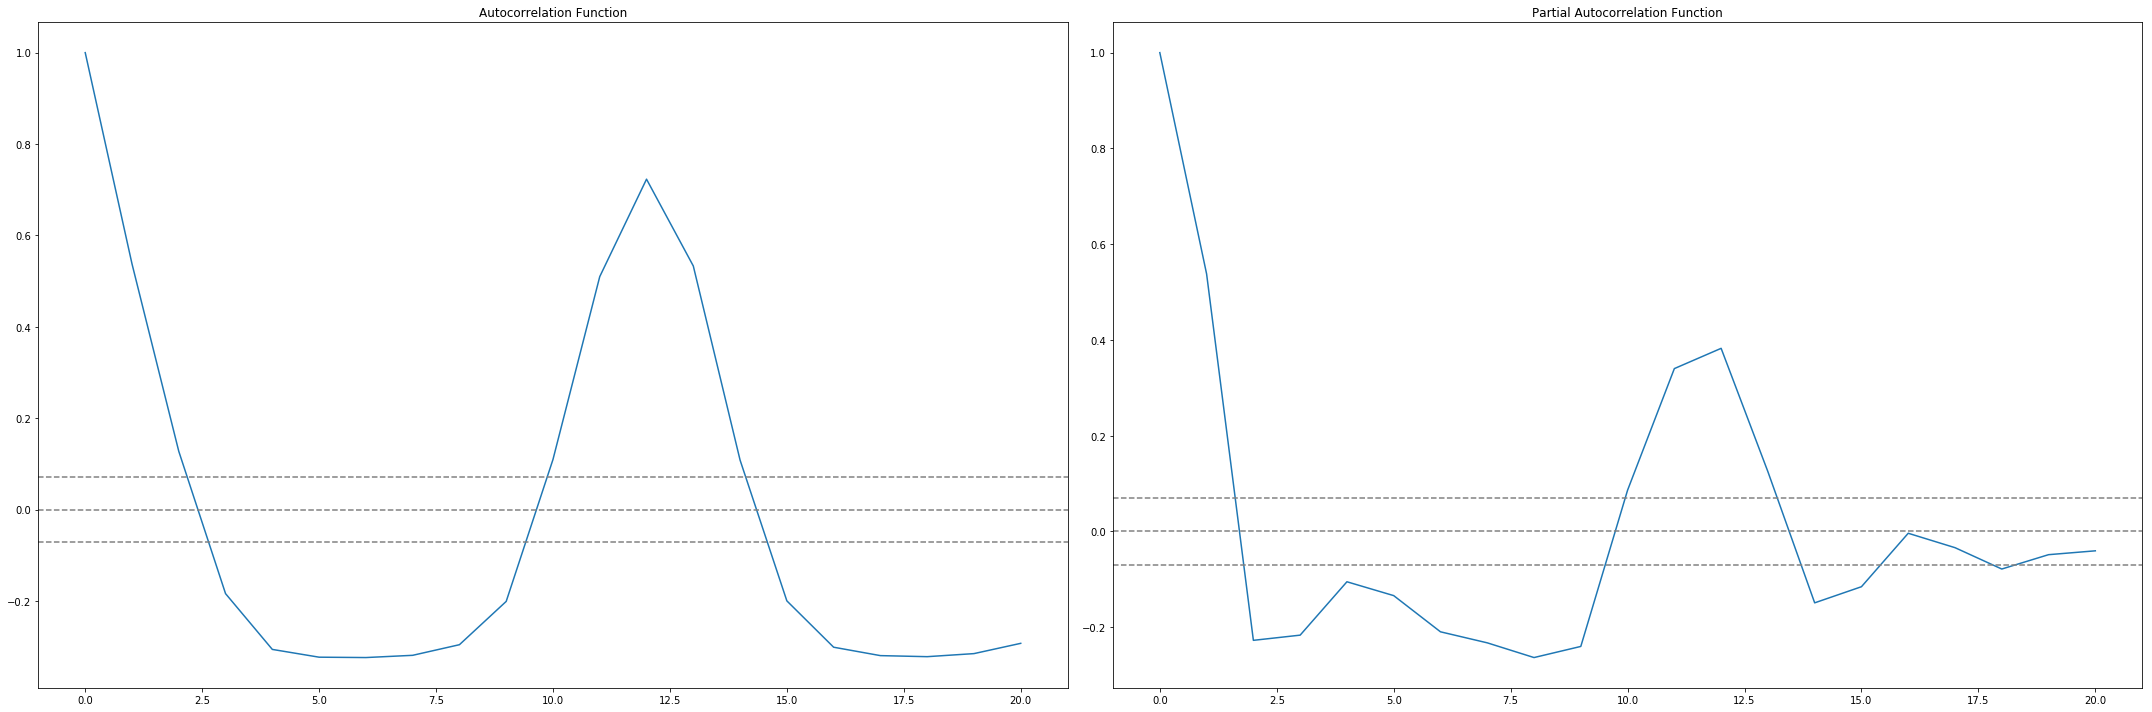

In [38]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(tstrain, nlags=20)
lag_pacf = pacf(tstrain, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tstrain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tstrain)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(tstrain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(tstrain)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [39]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot


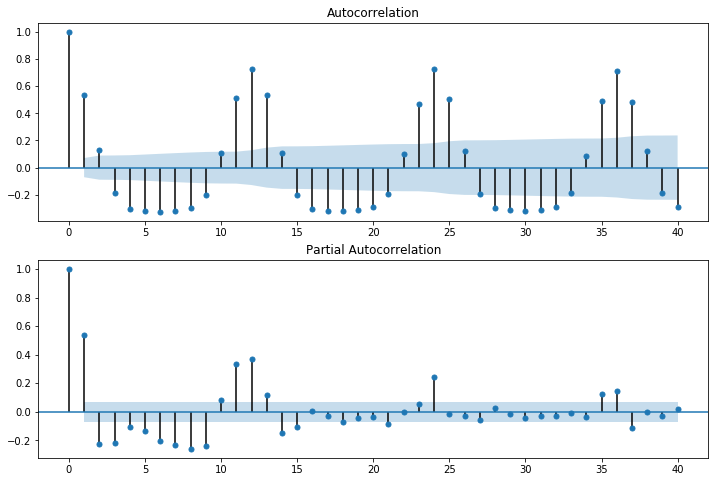

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(tstrain.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tstrain, lags=40, ax=ax2)

In [41]:
from statsmodels.tsa.arima_model import ARIMA


Text(0,0.5,'RAINFALL')

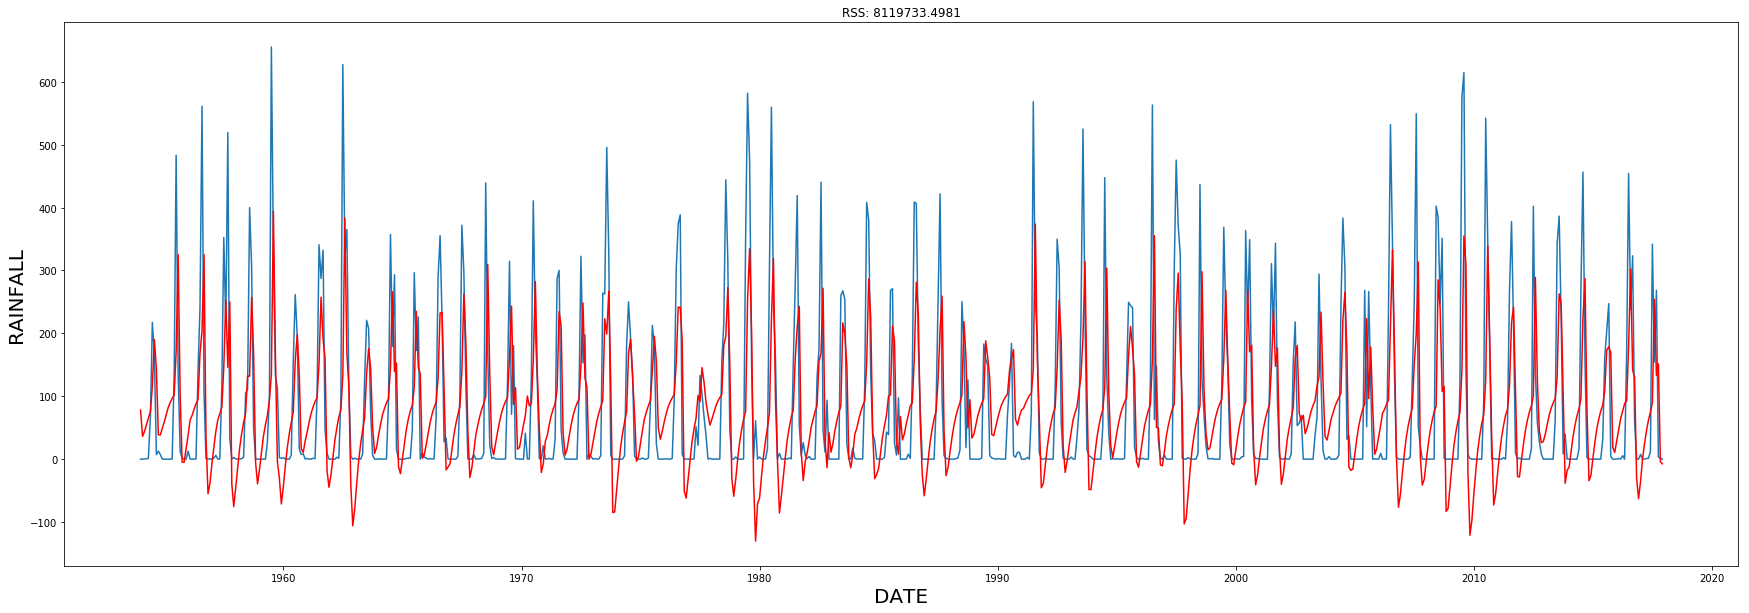

In [42]:
model = ARIMA(tstrain, order=(2, 0, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))
plt.xlabel('DATE', fontsize = 20)
plt.ylabel('RAINFALL', fontsize = 20)

In [43]:
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA.head())
q=predictions_ARIMA>=0
predictions_ARIMA.shape
for x in range(768):
    if(predictions_ARIMA[x]<0):
        predictions_ARIMA[x]=0.0

datetime
1954-01-01    77.918819
1954-02-01    36.221376
1954-03-01    43.668613
1954-04-01    54.706124
1954-05-01    65.171346
dtype: float64


Text(0.5,1,'RMSE: 101.0659')

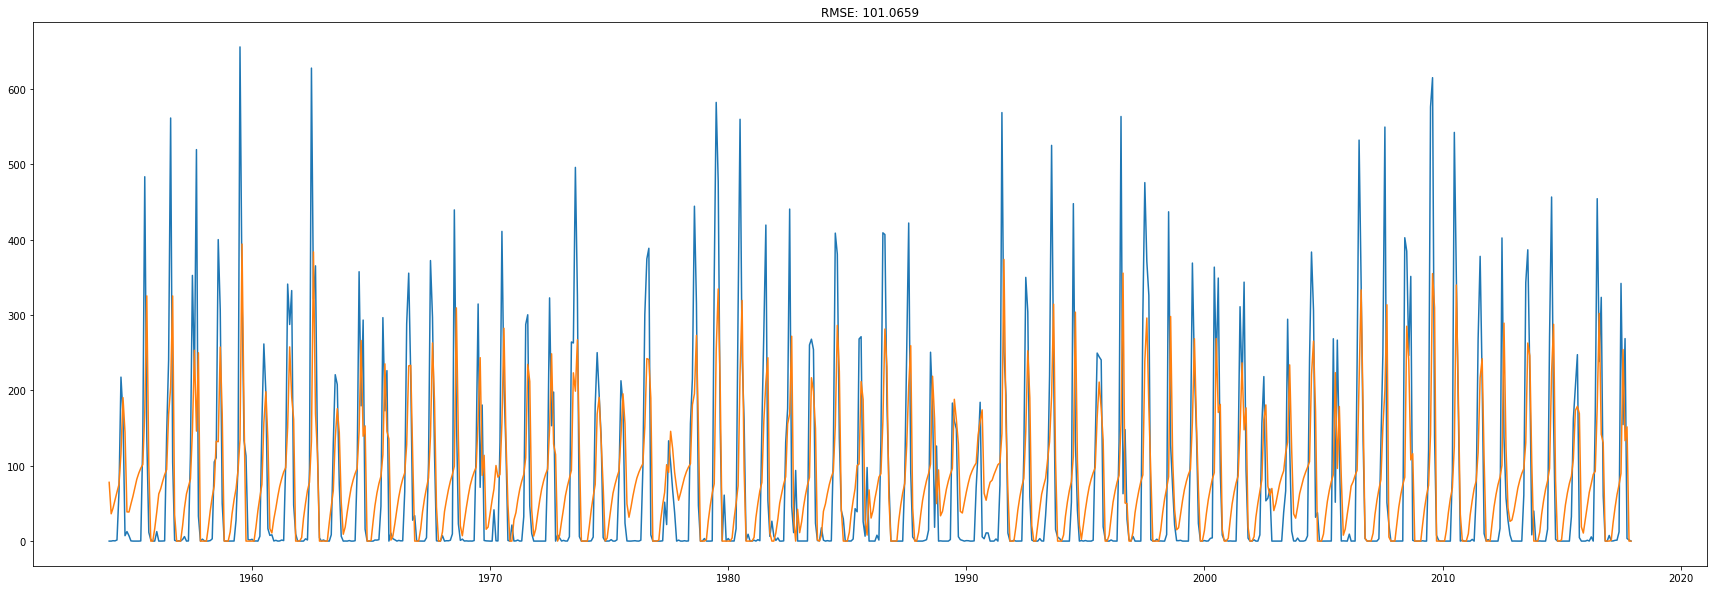

In [44]:
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

2018-01-01     14.060974
2018-02-01     43.203129
2018-03-01     74.114037
2018-04-01     97.755174
2018-05-01    109.535616
2018-06-01    109.386059
2018-07-01    100.560439
2018-08-01     87.839716
2018-09-01     75.796367
2018-10-01     67.583963
2018-11-01     64.445719
2018-12-01     65.884552
Freq: MS, dtype: float64

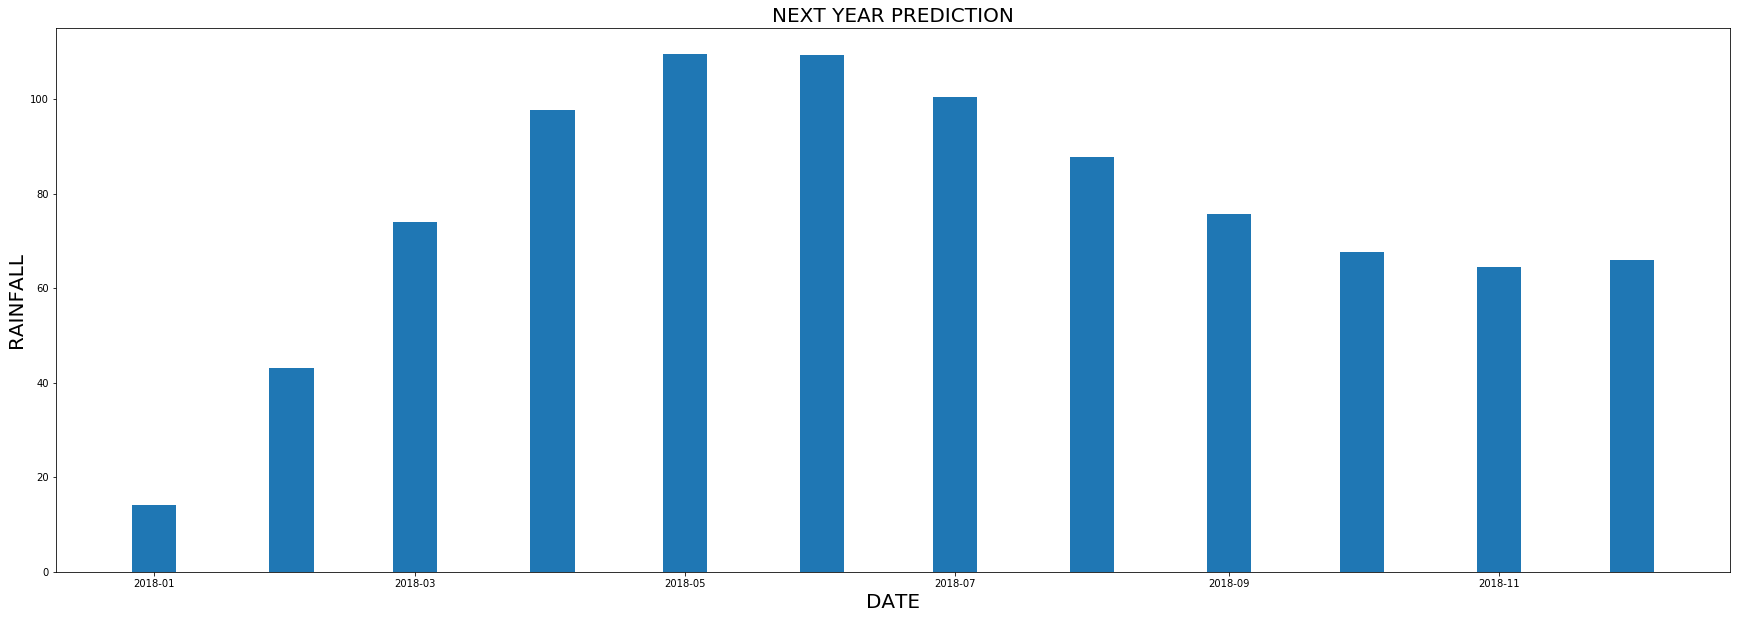

In [45]:
# multi-step out-of-sample forecast
start_index = 768
end_index = start_index + 11
forecast = results_ARIMA.predict(start=start_index, end=end_index)
plt.bar(forecast.index,forecast,width=10)
plt.title('NEXT YEAR PREDICTION',fontsize = 20)
plt.xlabel('DATE', fontsize = 20)
plt.ylabel('RAINFALL', fontsize = 20)
forecast

In [46]:
forecast.head()

2018-01-01     14.060974
2018-02-01     43.203129
2018-03-01     74.114037
2018-04-01     97.755174
2018-05-01    109.535616
Freq: MS, dtype: float64

In [47]:
pwd

'C:\\Users\\HP\\New folder (9)\\SIH'